In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, PandasTools

In [5]:
placed = PandasTools.LoadSDF('mols/fragmenstein.sdf', idName='name', molColName='mol').set_index('name')

In [6]:
from fragmenstein.display import MolNGLWidget

In [24]:
from fragmenstein.demo import MPro

rdocked = PandasTools.LoadSDF('rdock_vs_fragmenstein_summary.sdf', molColName='mol')

In [25]:
free_rdocked = rdocked.loc[rdocked.docking_type == 'freedocking'].drop_duplicates('name').set_index('name')
pharm_rdocked = rdocked.loc[rdocked.docking_type == 'pharm4constrdocking'].drop_duplicates('name').set_index('name')

In [31]:
from fragmenstein.branding import divergent_colors
view = MolNGLWidget()
i = 1
name = placed.index[i]
print(name)
view.add_mol(placed.mol[i], colorValue=divergent_colors[4][0])
view.add_mol(MPro.get_mol(placed.crystal_code[i]), colorValue=divergent_colors[4][1])
view.add_mol(free_rdocked.loc[name].mol, colorValue=divergent_colors[4][2])
view.add_mol(pharm_rdocked.loc[name].mol, colorValue=divergent_colors[4][3])
view

DAR-DIA-23aa0b97-13


MolNGLWidget()

In [92]:
for k in ('fraction_overlapping', '∆∆G', 'reference2minimized_rmsd', 'rdock_free', 'reference2hits_rmsd'):
    placed[k] = placed[k].astype(float)

placed['name'] = placed.index

In [60]:
from pathlib import Path
import pandas as pd

metadata = pd.read_csv(Path('~/Coding/moonshot_SI_task/moonshot_polished.csv').expanduser())

In [63]:
placed['pIC50'] = placed['name'].map(metadata.set_index('CID (canonical)').pIC50.to_dict())

nan

In [85]:
placed['pmilliIC50'] = placed['pIC50'] - 3

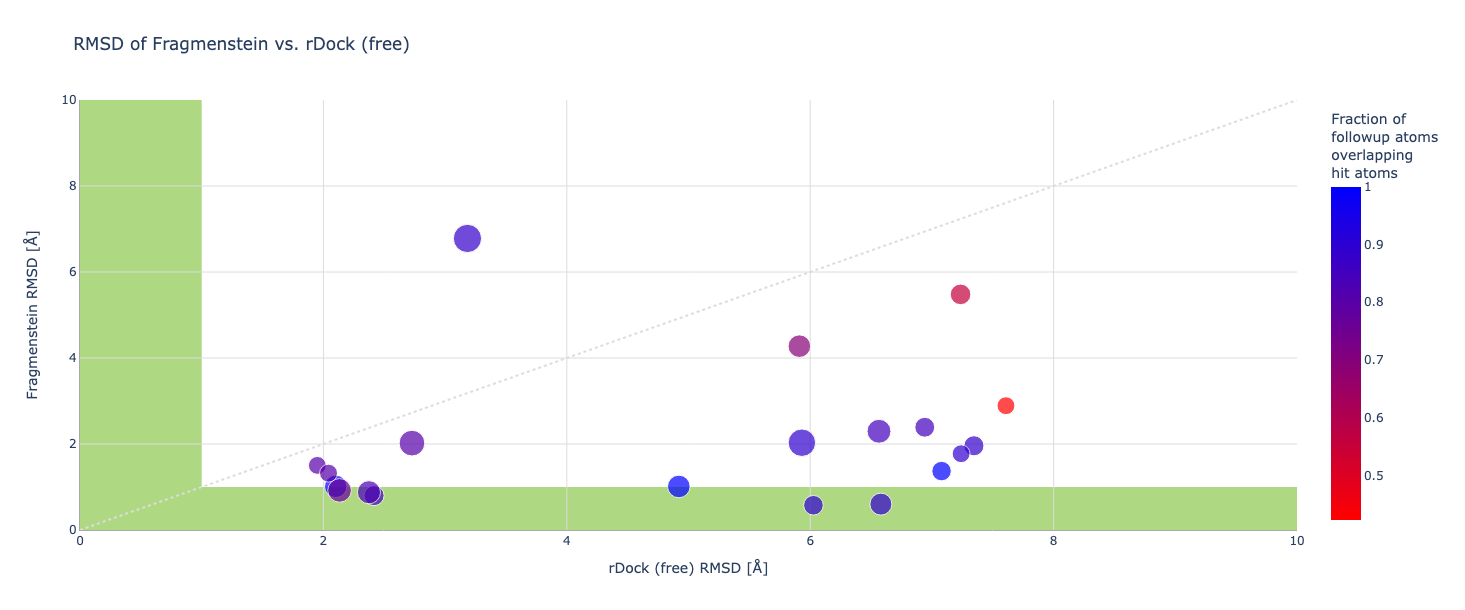

In [93]:
import plotly.express as px

fig = px.scatter(placed.loc[(placed.fraction_overlapping > 0.1) & (placed['∆∆G'] <= 0.) & ~placed.pIC50.isna()], # 
                 y='reference2minimized_rmsd', 
                 x='rdock_free', 
                 color='fraction_overlapping',
                 color_continuous_scale='Bluered_r',
                 size='pmilliIC50',
                 hover_data=['name'],
                 #symbol='based_on_x0434',
                 title='RMSD of Fragmenstein vs. rDock (free)',
                 width=600, height=600
                )
fig.add_shape(type="line",
    x0=0, y0=0, x1=10, y1=10,
    line=dict(
        color="gainsboro",
        width=2,
        dash="dot",
    )
)


fig.update_shapes(dict(xref='x', yref='y'))
fig.add_hrect(y0=0, y1=1, line_width=0, fillcolor="#AED882", opacity=1, layer='below')
fig.add_vrect(x0=0, x1=1, line_width=0, fillcolor="#AED882", opacity=1, layer='below')
fig.update_layout(paper_bgcolor='white', 
                  plot_bgcolor='white',
                 yaxis=dict(gridcolor='gainsboro', 
                            linecolor='darkgrey',
                            title='Fragmenstein RMSD [Å]',
                            range=(0, 10)
                           ),
                 xaxis=dict(gridcolor='gainsboro',
                            linecolor='darkgrey',
                            title='rDock (free) RMSD [Å]',
                            range=(0, 10)
                           ),
                  #legend=dict(orientation='h'),
                  coloraxis_colorbar=dict(title='Fraction of <br>followup atoms <br>overlapping <br>hit atoms')
                 )
#fig.layout.coloraxis.colorbar.orientation='h'
#fig.write_image("free.png")
#fig.write_image("free.svg")
fig

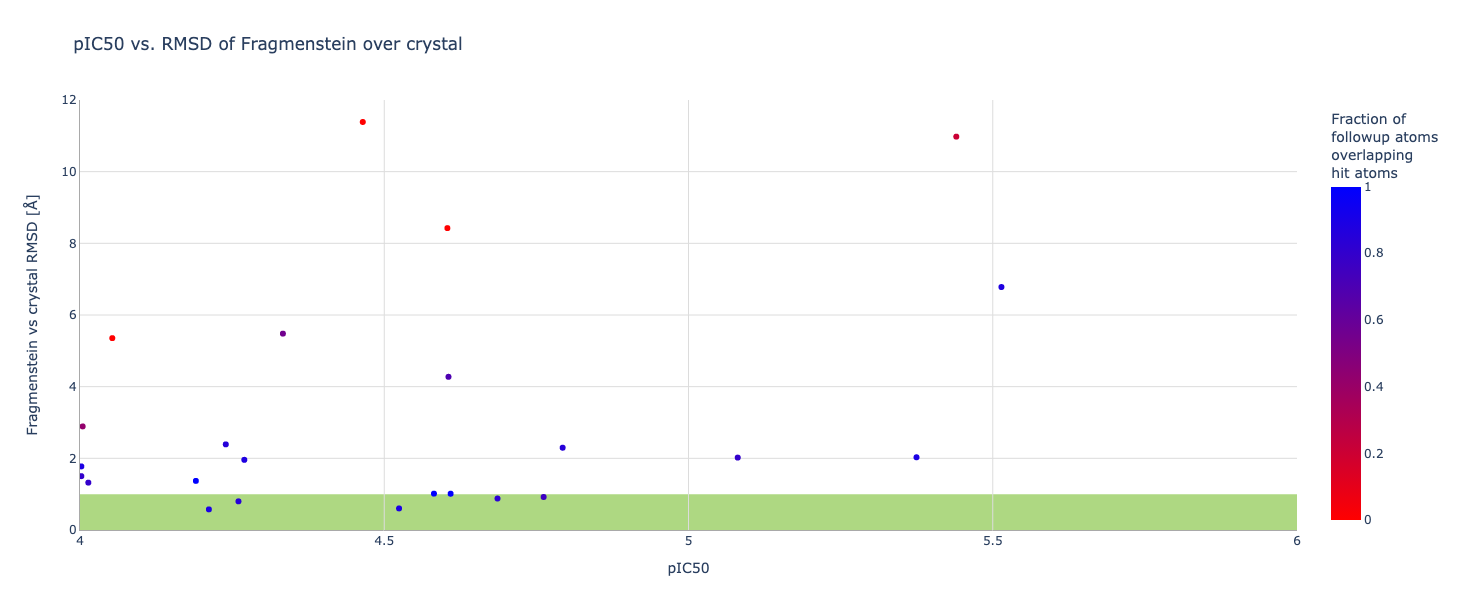

In [106]:
placed['blob'] = placed['pIC50'] - 4
import plotly.express as px

fig = px.scatter(placed.loc[ ~placed.pIC50.isna()], # 
                 y='reference2minimized_rmsd', 
                 x='pIC50',#'reference2hits_rmsd', 
                 color='fraction_overlapping',
                 color_continuous_scale='Bluered_r',
                 #size='blob',
                 hover_data=['name'],
                 #symbol='based_on_x0434',
                 title='pIC50 vs. RMSD of Fragmenstein over crystal',
                 width=600, height=600
                )

fig.update_shapes(dict(xref='x', yref='y'))
fig.add_hrect(y0=0, y1=1, line_width=0, fillcolor="#AED882", opacity=1, layer='below')
fig.add_vrect(x0=0, x1=1, line_width=0, fillcolor="#AED882", opacity=1, layer='below')
fig.update_layout(paper_bgcolor='white', 
                  plot_bgcolor='white',
                 yaxis=dict(gridcolor='gainsboro', 
                            linecolor='darkgrey',
                            title='Fragmenstein vs crystal RMSD [Å]',
                            range=(0, 12)
                           ),
                 xaxis=dict(gridcolor='gainsboro',
                            linecolor='darkgrey',
                            title='pIC50',
                            range=(4, 6)
                           ),
                  #legend=dict(orientation='h'),
                  coloraxis_colorbar=dict(title='Fraction of <br>followup atoms <br>overlapping <br>hit atoms')
                 )
#fig.layout.coloraxis.colorbar.orientation='h'
fig.write_image("pIC50-no_use.png")
#fig.write_image("free.svg")
fig

In [19]:
placed['reference2minimized_rmsd'] = placed.reference2minimized_rmsd.astype(float)
placed.loc[(placed.fraction_overlapping.astype(float) > 0.1) & (placed['∆∆G'].astype(float) <= 0.) & (placed.reference2minimized_rmsd > 5)].sort_values('reference2minimized_rmsd', ascending=False)[['reference2minimized_rmsd', 'crystal_code']].head(30)

,reference2minimized_rmsd,crystal_code
name,,
ALV-UNI-7ff1a6f9-47,7.755464,x2581
JOR-UNI-2fc98d0b-12,6.780460,x10236
BAR-COM-4e090d3a-49,6.640822,x2764
TRY-UNI-2eddb1ff-3,6.612662,x10900
MAK-UNK-6435e6c2-2,6.348549,x2779
MAK-UNK-6435e6c2-3,6.288513,x1386
BAR-COM-4e090d3a-47,5.959885,x3305
MAK-UNK-6435e6c2-4,5.829177,x1384
JAN-GHE-83b26c96-21,5.825001,x10606


In [22]:
', '.join(placed.loc[(placed.fraction_overlapping.astype(float) > 0.1) & (placed['∆∆G'].astype(float) <= 0.) & (placed.reference2minimized_rmsd > 5)].sort_values('reference2minimized_rmsd', ascending=False).crystal_code.to_list())

'x2581, x10236, x2764, x10900, x2779, x1386, x3305, x1384, x10606, x10723, x10049, x3366'